<a href="https://colab.research.google.com/github/GuyAvni1/Final-Project-Guy-Ori/blob/main/Code/Prediction_12m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Reading the data set from the drive
raw = pd.read_csv("/content/drive/MyDrive/Final_Project_Data/future_of_12m.csv")
# print(raw)
data = raw

# Define the condition for filtering
condition = data['Transition'] == 'CNtoAD'

# Filter the DataFrame based on the condition
data = data[~condition]  # ~ is used to select rows that don't meet the condition
data #Showing an example of the first 5 rows.


,RID,VISCODE,DX,FDG,AV45,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,MOCA,RAVLT_learning,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,Transition
0,4,0,MCI,1.241955,0.961954,1501.000000,153.100000,13.290000,1.0,14.33,21.330000,27.0,37.0,4.0,36.3636,0.0,23.921439,7.0,39605.000000,6869.000000,1.154980e+06,3983.000000,19036.000000,19615.000000,1.679440e+06,MCItoMCI
1,4,6,MCI,1.204971,1.118809,1156.613341,420.524969,38.788820,0.5,17.33,25.330000,28.0,33.0,1.0,11.1111,0.0,22.925493,7.0,39726.000000,6439.000000,1.116280e+06,3711.000000,17899.000000,20139.000000,1.661130e+06,MCItoMCI
2,5,0,CN,1.259560,1.350386,547.300000,337.000000,33.430000,0.0,8.67,14.670000,29.0,37.0,4.0,44.4444,0.0,22.879384,4.0,34062.000000,7075.000000,1.116630e+06,4433.000000,24788.000000,21614.000000,1.640770e+06,CNtoCN
3,5,12,CN,1.280900,1.354343,472.800000,334.100000,34.040000,1.5,5.67,9.393589,30.0,40.0,6.0,50.0000,0.0,25.098837,6.0,35333.000000,6832.000000,1.102410e+06,3609.000000,24193.000000,20474.000000,1.631430e+06,CNtoCN
4,5,24,CN,1.341630,1.045401,1407.828773,420.040324,39.029937,0.0,7.00,11.000000,29.0,36.0,3.0,37.5000,0.0,25.591836,4.0,37853.000000,6599.000000,1.098420e+06,4313.000000,23094.000000,19867.000000,1.634180e+06,CNtoCN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,6999,0,CN,1.261848,1.323500,793.050507,403.259610,40.026957,0.0,2.00,3.000000,30.0,50.0,2.0,15.3846,0.0,27.000000,9.0,31239.740928,7826.827931,1.071496e+06,4032.797394,18867.043105,21983.778837,1.564373e+06,CNtoCN
4814,7000,0,MCI,1.157213,1.036100,1600.915918,440.179577,41.095620,1.5,20.67,32.670000,24.0,20.0,4.0,100.0000,4.0,19.000000,1.0,29927.790793,6314.494035,1.026500e+06,3593.309232,18238.071265,19879.760759,1.482909e+06,MCItoMCI
4815,7015,0,MCI,1.195468,1.253063,959.180829,413.120350,38.954055,0.0,6.67,13.670000,28.0,33.0,4.0,50.0000,0.0,24.000000,4.0,74355.100000,6854.400000,1.159970e+06,3601.000000,19023.000000,22913.000000,1.679010e+06,MCItoMCI
4816,7016,0,MCI,1.202203,1.137317,1145.453046,433.016300,40.171164,0.0,6.33,12.330000,28.0,27.0,7.0,87.5000,0.0,21.000000,7.0,44915.225535,7041.613762,1.048767e+06,4184.069035,18341.590499,21225.605574,1.565263e+06,MCItoMCI


In [5]:
labels = data[['Transition']]
train_data = data.drop(['Transition','DX','RID','VISCODE'], axis = 1)
print("Shape of the training set: {}".format(train_data.shape))

Shape of the training set: (4817, 22)


In [6]:
labels.value_counts()

Transition
MCItoMCI      2383
CNtoCN        1419
ADtoAD         561
MCItoAD        395
CNtoMCI         59
dtype: int64

In [7]:
# Splitting the data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.3, stratify=labels)
print("Number of train samples:" + str(len(X_train)))
print("Number of test samples:" + str(len(X_test)))

Number of train samples:3371
Number of test samples:1446


In [8]:
print("Training set distribution:\n{}\n\n".format(y_train['Transition'].value_counts()))
print("Test set distribution:\n{}".format(y_test['Transition'].value_counts()))

Training set distribution:
MCItoMCI    1668
CNtoCN       993
ADtoAD       393
MCItoAD      276
CNtoMCI       41
Name: Transition, dtype: int64


Test set distribution:
MCItoMCI    715
CNtoCN      426
ADtoAD      168
MCItoAD     119
CNtoMCI      18
Name: Transition, dtype: int64


In [9]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

# **%%%%%%%%%%%%%%%RANDOM FOREST MODEL%%%%%%%%%%%%%%%%%**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracies = []
models = []
model_RFC = RandomForestClassifier(random_state=42) #Using Random Forest Classifier model
model_RFC.fit(X_train,y_train) #Training
y_pred_rfc = model_RFC.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred_rfc)))
print(classification_report(y_test,y_pred_rfc))
print(model_RFC.classes_)
accuracies.append(round(100*accuracy_score(y_test,y_pred_rfc),3))
models.append('RFC')

<ipython-input-10-fdad10553bd2>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(X_train,y_train) #Training


Model accuracy: 0.8257261410788381
              precision    recall  f1-score   support

      ADtoAD       0.80      0.77      0.78       168
      CNtoCN       0.91      0.89      0.90       426
     CNtoMCI       0.00      0.00      0.00        18
     MCItoAD       0.49      0.21      0.29       119
    MCItoMCI       0.81      0.92      0.86       715

    accuracy                           0.83      1446
   macro avg       0.60      0.56      0.57      1446
weighted avg       0.80      0.83      0.81      1446

['ADtoAD' 'CNtoCN' 'CNtoMCI' 'MCItoAD' 'MCItoMCI']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


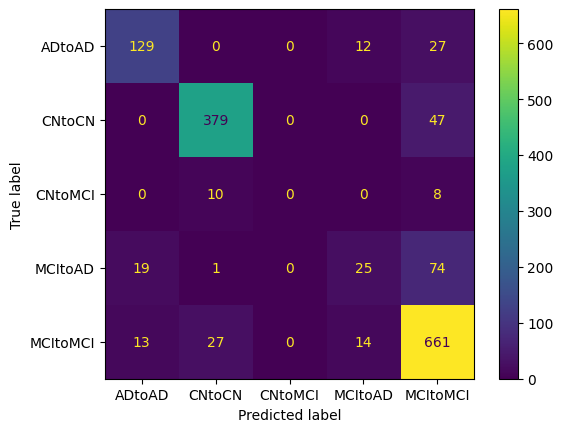

In [11]:
cm = confusion_matrix(y_test, y_pred_rfc, labels = model_RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_RFC.classes_)
disp.plot()

# **%%%%%%%%%%%%%%%XGBOOST MODEL%%%%%%%%%%%%%%%%%**

In [12]:
list_labels = list(labels.Transition)
label_converter = {
    "ADtoAD": 0,
    "CNtoCN": 1,
    "CNtoMCI": 2,
    "MCItoAD": 3,
    "MCItoMCI": 4


}


def convert_labels(labels):
    converted_labels = [label_converter[label] for label in labels]
    return converted_labels


In [13]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
y_train_list = list(y_train.Transition)
y_test_list = list(y_test.Transition)

# Convert the training and testing sets into DMatrix format (specific to XGBoost)
y_train1 = convert_labels(y_train_list)
y_test1 = convert_labels(y_test_list)
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train1)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test1)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for multi-class classification
    'num_class': 5,  # number of classes
    'eval_metric': 'merror',  # evaluation metric
    'eta': 0.1,  # learning rate
    'max_depth': 3  # maximum depth of each tree
}

# Train the XGBoost model
num_rounds = 100  # number of boosting rounds
model_XGB = xgb.train(params, train_dmatrix, num_rounds)

# Make predictions on the testing set
y_pred_xgb = model_XGB.predict(test_dmatrix)

# Evaluate the model
print("Model accuracy: " + str(accuracy_score(y_test1,y_pred_xgb)))
print(classification_report(y_test1,y_pred_xgb))
print(label_converter)
accuracies.append(round(100*accuracy_score(y_test1,y_pred_xgb),3))
models.append('XGB')

Model accuracy: 0.8250345781466113
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       168
           1       0.89      0.90      0.89       426
           2       0.00      0.00      0.00        18
           3       0.48      0.26      0.34       119
           4       0.82      0.90      0.86       715

    accuracy                           0.83      1446
   macro avg       0.60      0.57      0.58      1446
weighted avg       0.80      0.83      0.81      1446

{'ADtoAD': 0, 'CNtoCN': 1, 'CNtoMCI': 2, 'MCItoAD': 3, 'MCItoMCI': 4}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'ADtoAD': 0, 'CNtoCN': 1, 'CNtoMCI': 2, 'MCItoAD': 3, 'MCItoMCI': 4}


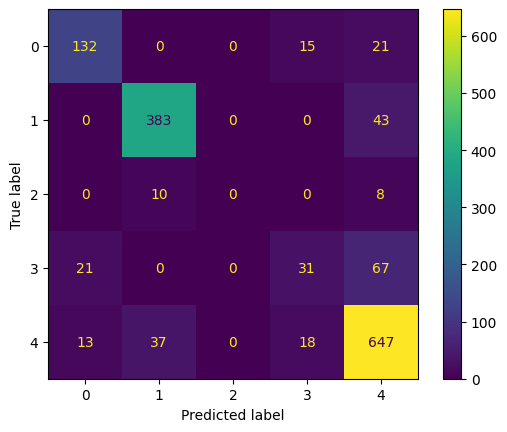

In [14]:
print(label_converter)
cm = confusion_matrix(y_test1, y_pred_xgb, labels = list(label_converter.values()))
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = list(label_converter.values()))
disp.plot()

# **%%%%%%%%%%%%%%%OVER SAMPLING PERFORMANCE%%%%%%%%%%%%%%%%%**

In [15]:
#Reading the data set from the drive
raw = pd.read_csv("/content/drive/MyDrive/Final_Project_Data/future_of_12m.csv")
# print(raw)
data = raw

# Define the condition for filtering
condition = data['Transition'] == 'CNtoAD'

# Filter the DataFrame based on the condition
data = data[~condition]  # ~ is used to select rows that don't meet the condition

In [16]:
labels = data[['Transition']]
train_data = data.drop(['Transition','DX','RID','VISCODE'], axis = 1)
print("Shape of the training set: {}".format(train_data.shape))

Shape of the training set: (4817, 22)


In [17]:
# Splitting the data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.3, stratify=labels)
print("Number of train samples:" + str(len(X_train)))
print("Number of test samples:" + str(len(X_test)))

Number of train samples:3371
Number of test samples:1446


In [18]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


# Display class distribution before resampling
print("Class distribution before resampling:", Counter(y_train.Transition))
print("Samples before resampling:", len(y_train.Transition))
# Apply RandomOverSampler to balance the classes
strategy = {
    "ADtoAD": 650,
    "CNtoCN": 1500,
    "CNtoMCI": 80,
    "MCItoAD": 500,
    "MCItoMCI": 2000
}

ros = RandomOverSampler(sampling_strategy = strategy, random_state = 42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Display class distribution after resampling
print("Class distribution after resampling:", Counter(y_train_resampled.Transition))
print("Samples after resampling:", len(y_train_resampled.Transition))


Class distribution before resampling: Counter({'MCItoMCI': 1668, 'CNtoCN': 993, 'ADtoAD': 393, 'MCItoAD': 276, 'CNtoMCI': 41})
Samples before resampling: 3371
Class distribution after resampling: Counter({'MCItoMCI': 2000, 'CNtoCN': 1500, 'ADtoAD': 650, 'MCItoAD': 500, 'CNtoMCI': 80})
Samples after resampling: 4730


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (2000) in class MCItoMCI will be larger than the number of samples in the majority class (class #MCItoMCI -> 1668)
  warnings.warn(


# **%%%%%%%%%%%RFC - RandomOverSampler PERFORMANCE%%%%%%%%%%%%%**

In [20]:
model_RFC_balanced = RandomForestClassifier(random_state=42) #Using Random Forest Classifier model
model_RFC_balanced.fit(X_train_resampled,y_train_resampled) #Training
y_pred_rfc_balenced = model_RFC_balanced.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred_rfc_balenced)))
print(classification_report(y_test,y_pred_rfc_balenced))
print(model_RFC_balanced.classes_)
accuracies.append(round(100*accuracy_score(y_test,y_pred_rfc_balenced),3))
models.append('RFC_ROS')

<ipython-input-20-5ac9572dd392>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC_balanced.fit(X_train_resampled,y_train_resampled) #Training


Model accuracy: 0.818118948824343
              precision    recall  f1-score   support

      ADtoAD       0.84      0.76      0.80       168
      CNtoCN       0.90      0.90      0.90       426
     CNtoMCI       0.00      0.00      0.00        18
     MCItoAD       0.37      0.18      0.25       119
    MCItoMCI       0.80      0.91      0.85       715

    accuracy                           0.82      1446
   macro avg       0.58      0.55      0.56      1446
weighted avg       0.79      0.82      0.80      1446

['ADtoAD' 'CNtoCN' 'CNtoMCI' 'MCItoAD' 'MCItoMCI']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


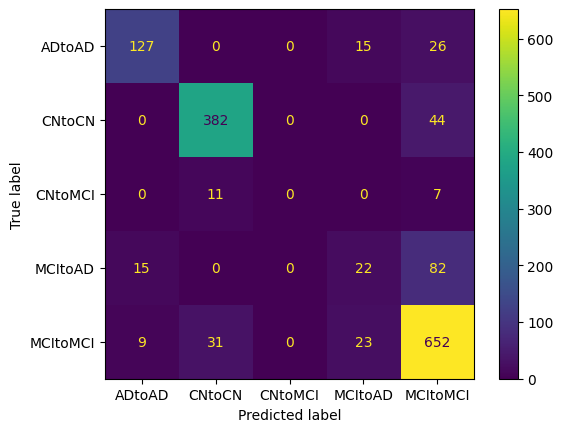

In [21]:
cm = confusion_matrix(y_test, y_pred_rfc_balenced, labels = model_RFC_balanced.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_RFC_balanced.classes_)
disp.plot()

# **%%%%%%%%%%%XGB - RandomOverSampler PERFORMANCE%%%%%%%%%%%%%**

In [22]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
y_train_list_resampled = list(y_train_resampled.Transition)
y_test_list_resampled = list(y_test.Transition)

# Convert the training and testing sets into DMatrix format (specific to XGBoost)
y_train_resampled1 = convert_labels(y_train_list_resampled)
y_test1 = convert_labels(y_test_list_resampled)
train_dmatrix_resampled = xgb.DMatrix(data=X_train_resampled, label=y_train_resampled1)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test1)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for multi-class classification
    'num_class': 5,  # number of classes
    'eval_metric': 'merror',  # evaluation metric
    'eta': 0.1,  # learning rate
    'max_depth': 3  # maximum depth of each tree
}

# Train the XGBoost model
num_rounds = 100  # number of boosting rounds
model_XGB_balanced = xgb.train(params, train_dmatrix_resampled, num_rounds)

# Make predictions on the testing set
y_pred_xgb_balanced = model_XGB_balanced.predict(test_dmatrix)

# Evaluate the model
print("Model accuracy: " + str(accuracy_score(y_test1,y_pred_xgb_balanced)))
print(classification_report(y_test1,y_pred_xgb_balanced))
print(label_converter)
accuracies.append(round(100*accuracy_score(y_test1,y_pred_xgb_balanced),3))
models.append('XGB_ROS')

Model accuracy: 0.8195020746887967
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       168
           1       0.89      0.89      0.89       426
           2       0.00      0.00      0.00        18
           3       0.42      0.29      0.34       119
           4       0.82      0.90      0.86       715

    accuracy                           0.82      1446
   macro avg       0.59      0.57      0.58      1446
weighted avg       0.80      0.82      0.81      1446

{'ADtoAD': 0, 'CNtoCN': 1, 'CNtoMCI': 2, 'MCItoAD': 3, 'MCItoMCI': 4}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


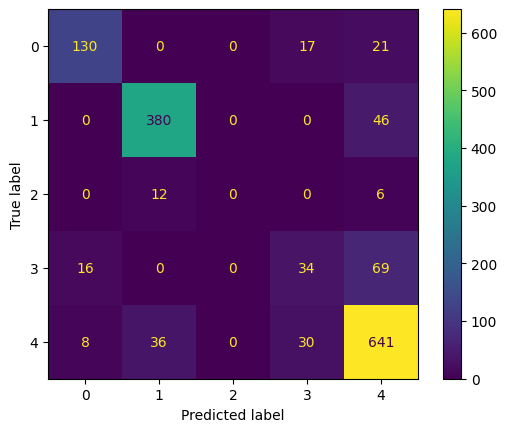

In [23]:
cm = confusion_matrix(y_test1, y_pred_xgb_balanced, labels = list(label_converter.values()))
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = list(label_converter.values()))
disp.plot()

In [24]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

strategy = {
    "ADtoAD": 650,
    "CNtoCN": 1500,
    "CNtoMCI": 80,
    "MCItoAD": 500,
    "MCItoMCI": 2000
}
# Instantiate the SMOTE object
smote = SMOTE(sampling_strategy = strategy, random_state=42)

# Apply SMOTE to the dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Count the class distribution before and after SMOTE
unique, counts = np.unique(y_train, return_counts=True)
original_class_distribution = dict(zip(unique, counts))

unique, counts = np.unique(y_train_resampled, return_counts=True)
resampled_class_distribution = dict(zip(unique, counts))

print("Class distribution before SMOTE:", original_class_distribution)
print("Class distribution after SMOTE:", resampled_class_distribution)


Class distribution before SMOTE: {'ADtoAD': 393, 'CNtoCN': 993, 'CNtoMCI': 41, 'MCItoAD': 276, 'MCItoMCI': 1668}
Class distribution after SMOTE: {'ADtoAD': 650, 'CNtoCN': 1500, 'CNtoMCI': 80, 'MCItoAD': 500, 'MCItoMCI': 2000}


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (2000) in class MCItoMCI will be larger than the number of samples in the majority class (class #MCItoMCI -> 1668)
  warnings.warn(


# **%%%%%%%%%%%%%RFC - SMOTE PERFORMANCE%%%%%%%%%%%%%%%**

In [25]:
model_RFC_balanced = RandomForestClassifier(random_state=42) #Using Random Forest Classifier model
model_RFC_balanced.fit(X_train_resampled,y_train_resampled) #Training
y_pred_rfc_balenced = model_RFC_balanced.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred_rfc_balenced)))
print(classification_report(y_test,y_pred_rfc_balenced))
print(model_RFC_balanced.classes_)
accuracies.append(round(100*accuracy_score(y_test,y_pred_rfc_balenced),3))
models.append('RFC_SMOTE')

<ipython-input-25-5b78a6909a99>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC_balanced.fit(X_train_resampled,y_train_resampled) #Training


Model accuracy: 0.8146611341632088
              precision    recall  f1-score   support

      ADtoAD       0.81      0.76      0.79       168
      CNtoCN       0.90      0.89      0.89       426
     CNtoMCI       0.00      0.00      0.00        18
     MCItoAD       0.38      0.24      0.30       119
    MCItoMCI       0.81      0.90      0.85       715

    accuracy                           0.81      1446
   macro avg       0.58      0.56      0.57      1446
weighted avg       0.79      0.81      0.80      1446

['ADtoAD' 'CNtoCN' 'CNtoMCI' 'MCItoAD' 'MCItoMCI']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


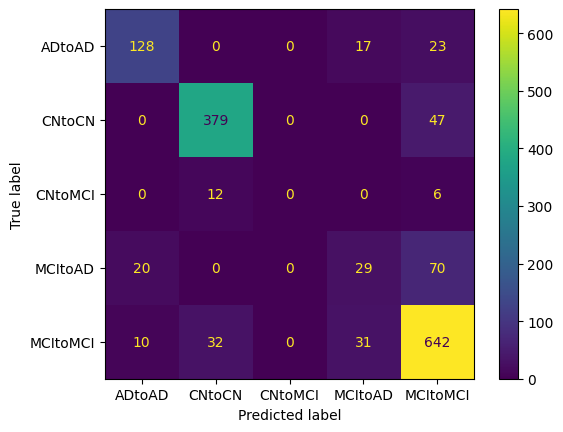

In [26]:
cm = confusion_matrix(y_test, y_pred_rfc_balenced, labels = model_RFC_balanced.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_RFC_balanced.classes_)
disp.plot()

# **%%%%%%%%%%%%%XGB - SMOTE PERFORMANCE%%%%%%%%%%%%%%%**

In [27]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
y_train_list_resampled = list(y_train_resampled.Transition)
y_test_list_resampled = list(y_test.Transition)

# Convert the training and testing sets into DMatrix format (specific to XGBoost)
y_train_resampled1 = convert_labels(y_train_list_resampled)
y_test1 = convert_labels(y_test_list_resampled)
train_dmatrix_resampled = xgb.DMatrix(data=X_train_resampled, label=y_train_resampled1)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test1)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for multi-class classification
    'num_class': 5,  # number of classes
    'eval_metric': 'merror',  # evaluation metric
    'eta': 0.1,  # learning rate
    'max_depth': 3  # maximum depth of each tree
}

# Train the XGBoost model
num_rounds = 100  # number of boosting rounds
model_XGB_balanced = xgb.train(params, train_dmatrix_resampled, num_rounds)

# Make predictions on the testing set
y_pred_xgb_balanced = model_XGB_balanced.predict(test_dmatrix)

# Evaluate the model
print("Model accuracy: " + str(accuracy_score(y_test1,y_pred_xgb_balanced)))
print(classification_report(y_test1,y_pred_xgb_balanced))
print(label_converter)
accuracies.append(round(100*accuracy_score(y_test1,y_pred_xgb_balanced),3))
models.append('XGB_SMOTE')

Model accuracy: 0.8125864453665284
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       168
           1       0.89      0.89      0.89       426
           2       0.00      0.00      0.00        18
           3       0.37      0.29      0.33       119
           4       0.83      0.87      0.85       715

    accuracy                           0.81      1446
   macro avg       0.57      0.57      0.57      1446
weighted avg       0.79      0.81      0.80      1446

{'ADtoAD': 0, 'CNtoCN': 1, 'CNtoMCI': 2, 'MCItoAD': 3, 'MCItoMCI': 4}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


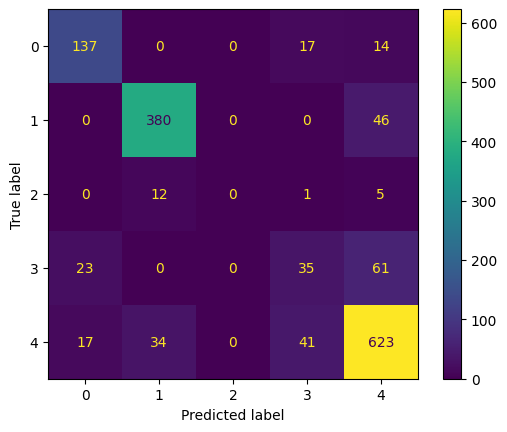

In [28]:
cm = confusion_matrix(y_test1, y_pred_xgb_balanced, labels = list(label_converter.values()))
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = list(label_converter.values()))
disp.plot()

# **%%%%%%%%%%%%%SUMMERIZE%%%%%%%%%%%%%%%**

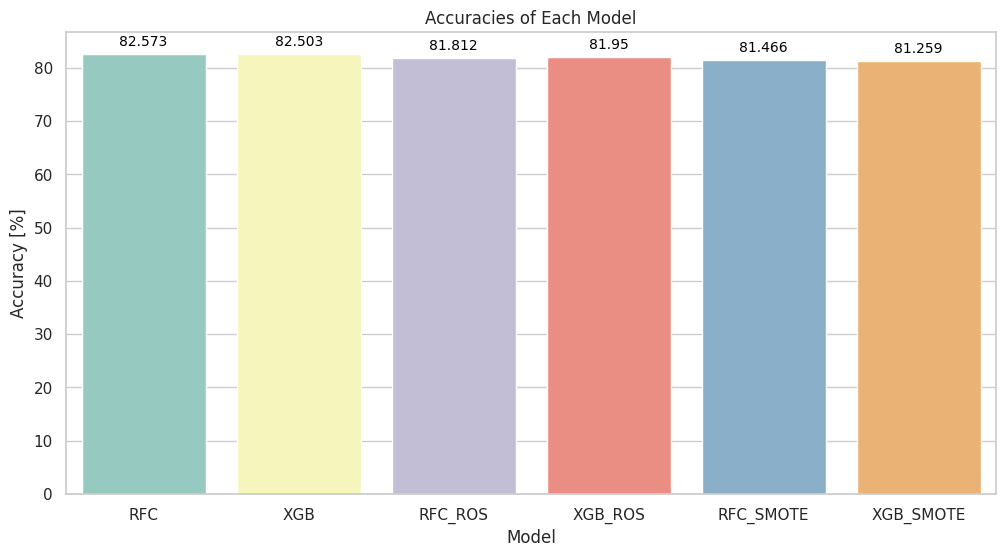

In [31]:
# Create a bar plot
plt.figure(figsize = (12,6))
sns.set(style="whitegrid")  # Optional: Set a seaborn style
ax = sns.barplot(x=models, y=accuracies, palette = "Set3")


# Add labels and a title

plt.xlabel("Model")
plt.ylabel("Accuracy [%]")
plt.title("Accuracies of Each Model")

# Display the values in the center of each bar
for i, v in enumerate(accuracies):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()